In [1]:
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt

# 第６章 確率・統計

## 6.1 確率の概念
### 6.1.1 確率とは
* 確率（Probability）: ある事象が発生することの期待の度合。
$$P(A) = \frac{a}{n}$$


### 6.1.2 余事象
* 余事象（Remaining Events）: 事象Aが起こらない場合の事象のこと
* $\bar{A}$
* $P(\bar{A}) = 1-P(A)$

### 6.1.3 確率への収束
* 試行回数が大きくなると、確率が収束することがわかる。

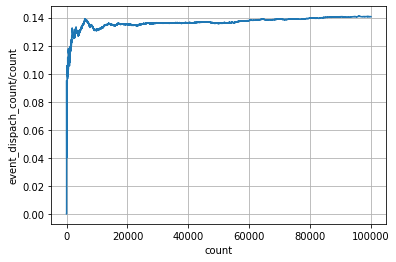

In [2]:
def L_6_1(TryCount:int):
    x = []
    y = []
    count:int = 0
    event_dispach_count:int = 0
    for i in range(TryCount):
        if np.random.randint(6+1) == 5:
            event_dispach_count += 1
        
        count += 1
        x.append(count)
        y.append(event_dispach_count/count)
    
    plt.plot(x, y)
    plt.xlabel('count')
    plt.ylabel('event_dispach_count/count')
    plt.grid()
    
    plt.show()

L_6_1(100000)

## 6.2 平均値と期待値
### 6.2.1 平均値
* $\mu = \frac{x_1 + ... + x_n}{n} = \frac{1}{n}\Sigma_{k=1}^{n}x_k$

### 6.2.2 平均値の実装

In [3]:
x = np.array([50, 40, 30, 20, 10, 2])

avg = np.average(x)
print(avg)

25.333333333333332


### 6.2.3 期待値とは
* 期待値：得られる値の「見込み」
* $E = \Sigma_{k=1}^{n}P_k x_k$
  * $x_k:k回目の試行の結果、P_k:x_kの出現確率$
* 値とその確率の総和が期待値になる。

### 6.2.4 期待値の実装

In [4]:
p = np.array([0.8, 0.15, 0.05])
x = np.array([50, 40, 30])

E = np.sum(p * x)
print(E)

47.5


### 6.2.5 平均と期待値の関係
* 導出はP.196
* 式変形により平均値と期待値は同じ意味を示す。

### 6.2.6 演習

In [7]:
p: ndarray = np.array([0.75, 0.23, 0.02]) #事象発生確率
x: ndarray = np.array([100, 500, 1000]) #確率pで得られる値

E:float = np.sum(p * x) 
print(E)

210.0


## 6.3 分散と標準偏差
* 偏差：実測値と平均値（期待値）の差(データの個数：$n$, 平均値：$\mu$, 添え字：$k$)
  * $x_k - \mu$
* 分散：$偏差^2の平均値$
  * $\frac{1}{n}\Sigma_{k=1}^{n}(x_k-\mu)^2$
  * データのばらつき具合を示す度合

### 6.3.1 分散の実装


In [2]:
sample1: ndarray = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
samle2: ndarray = np.array([num for num in range(1, 11, 3)])

variance1: float = np.var(sample1)
variance2: float = np.var(samle2)

print(variance1)
print(variance2)

8.25
11.25


### 6.3.2 標準偏差とは

* 標準偏差：$\sqrt{分散}$
  * 分散だと単位の２乗値になり元の値よりも大きくなる。そこで、分散の平方根をとることで得られる値を小さくする。
  * 単位の次元が元のデータの次元と同じになるので、ばらつき度合いとして直感的に分散よりも扱いやすい。
* 標準偏差$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n}\Sigma_{k=1}{n}(x_k-\mu)^2}$ 

### 6.3.3 標準偏差の実装

In [3]:
standard_deviation: float = np.std(sample1)
standard_deviation2: float = np.std(samle2)

print(standard_deviation)
print(standard_deviation2)

2.8722813232690143
3.3541019662496847


In [4]:
x: ndarray = np.array([51, 49, 52, 48])

variance: float = np.var(x)
standard_deviation: float = np.std(x)

print(variance)
print(standard_deviation)

2.5
1.5811388300841898


## 6.4 正規分布とべき乗則

### 6.4.1 正規分布とは

* 正規分布（ガウス分布）：実世界の事象に良くあてはまる分布。
* 平均$\mu$は分布図横軸（データ値）の中心、標準偏差$\sigma$は分布の広がり具合を表す。
* 確率の世界における関数：確率密度関数。
* 正規分布を確率密度関数に変換すると、$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

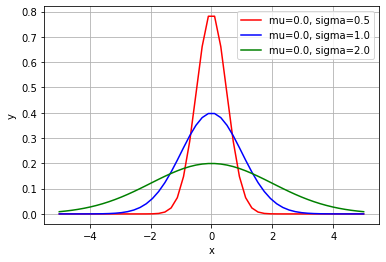

In [3]:
def gaussian_distribution(x_lin:ndarray , mu:float, sigma:float) -> float:
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x_lin - mu) ** 2 / (2 * sigma ** 2))


def ready_to_plot(x_F, y_F, color:str, line_style:str, label:str) -> None:
    
    plt.plot(x_F, y_F, color=color, linestyle=line_style, label=label)
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    

x: ndarray = np.linspace(-5, 5)
y1 = gaussian_distribution(x, 0.0, 0.5)
y2 = gaussian_distribution(x, 0.0, 1.0)
y3 = gaussian_distribution(x, 0.0, 2.0)

ready_to_plot(x, y1, "red", "solid", "mu=0.0, sigma=0.5")
ready_to_plot(x, y2, "blue", "solid", "mu=0.0, sigma=1.0")
ready_to_plot(x, y3, "green", "solid", "mu=0.0, sigma=2.0")

plt.show()


### 6.4.3 正規分布に従う乱数

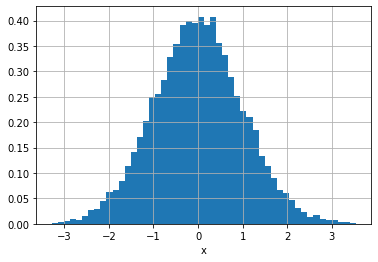

In [3]:
s: ndarray = np.random.normal(0, 1, 10000)

plt.hist(s, bins=50, density=True)
plt.xlabel("x")
plt.grid()

plt.show()

### 6.4.4 べき乗則とは
* べき乗則：$f(x) = cx^-k (c, kは定数)$
* 正規分布の親戚みたいなもん、
* 反比例の式のように、広い範囲をカバーする。
* 極端にまれな頻度の事象を扱う。

In [ ]:
def power_func(x:ndarray, c:float, k:float) -> ndarray:
    return c * x ** k